In [1]:
#from google.colab import files
#files.upload()

In [2]:
#try : 
#  %tensorflow_version 2.x
#except Exception :
#  pass

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t   
%matplotlib inline 

## Let's take a quick look on the data

In [4]:
data = pd.read_csv('high_diamond_ranked_10min.csv')
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
gameId                          9879 non-null int64
blueWins                        9879 non-null int64
blueWardsPlaced                 9879 non-null int64
blueWardsDestroyed              9879 non-null int64
blueFirstBlood                  9879 non-null int64
blueKills                       9879 non-null int64
blueDeaths                      9879 non-null int64
blueAssists                     9879 non-null int64
blueEliteMonsters               9879 non-null int64
blueDragons                     9879 non-null int64
blueHeralds                     9879 non-null int64
blueTowersDestroyed             9879 non-null int64
blueTotalGold                   9879 non-null int64
blueAvgLevel                    9879 non-null float64
blueTotalExperience             9879 non-null int64
blueTotalMinionsKilled          9879 non-null int64
blueTotalJungleMinionsKilled    9879 non-null int64
blueGol

In [6]:
data = data.drop('gameId',axis =1 )

In [7]:
data.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000



It looks like some columns have abnormal values
Let's plot them

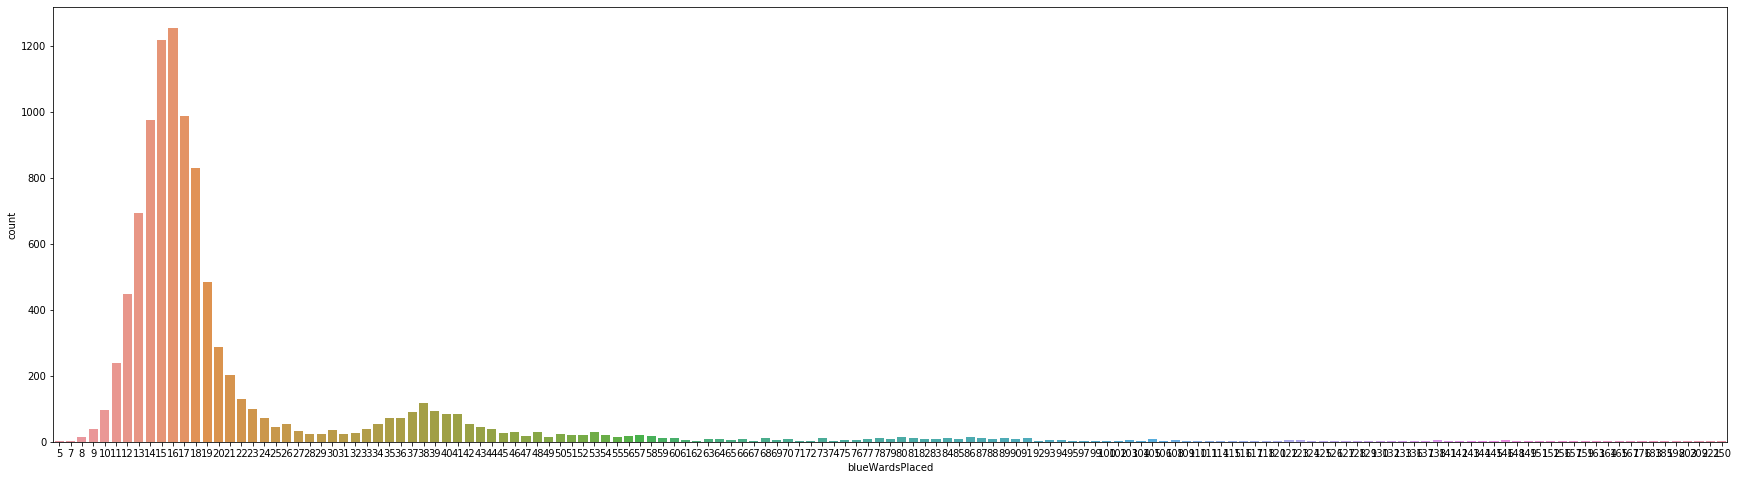

In [8]:
plt.figure(figsize=(30,8))
sns.countplot(data['blueWardsPlaced'])

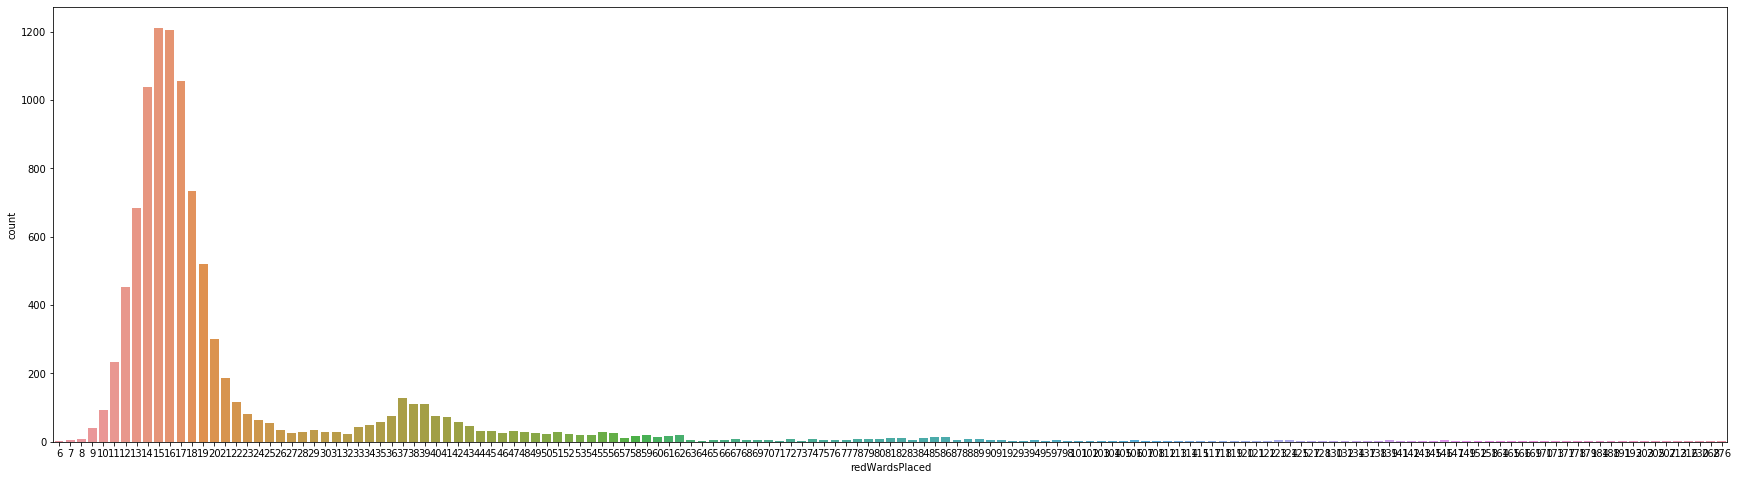

In [9]:
plt.figure(figsize=(30,8))
sns.countplot(data['redWardsPlaced'])

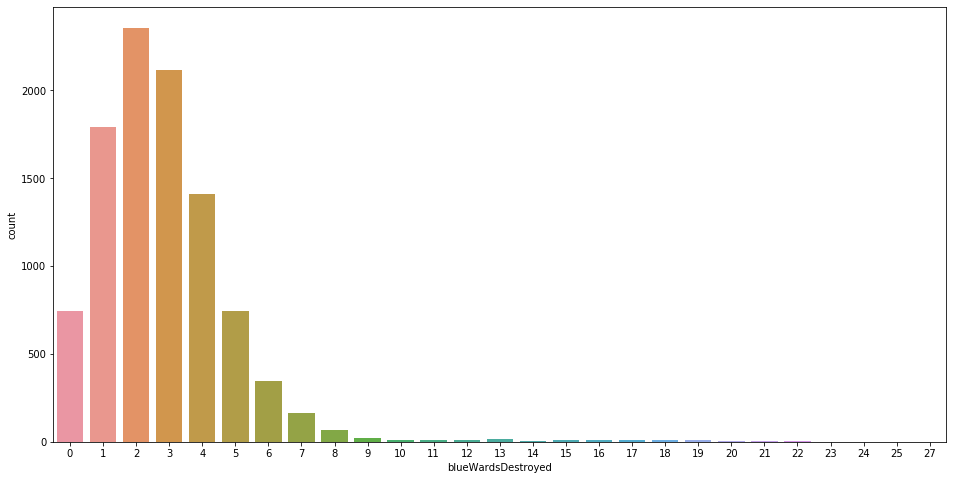

In [10]:
plt.figure(figsize=(16,8))
sns.countplot(data['blueWardsDestroyed'])

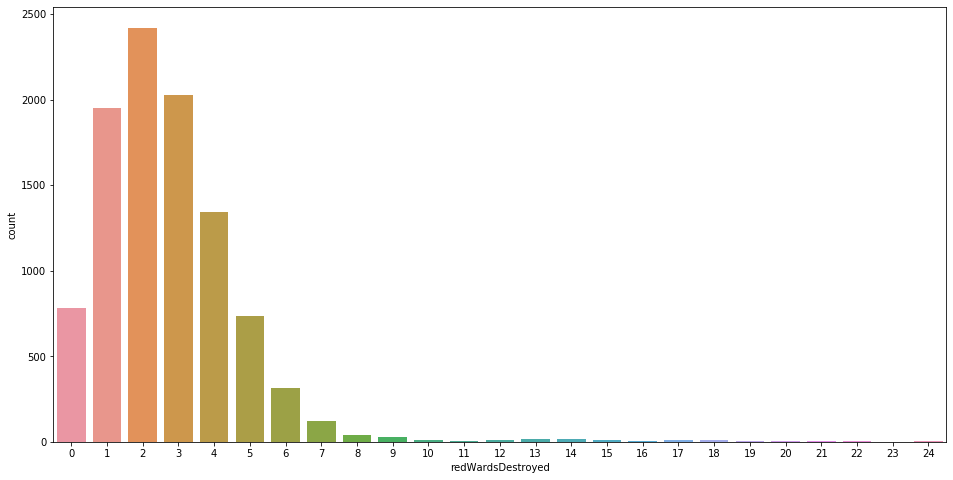

In [11]:
plt.figure(figsize=(16,8))
sns.countplot(data['redWardsDestroyed'])

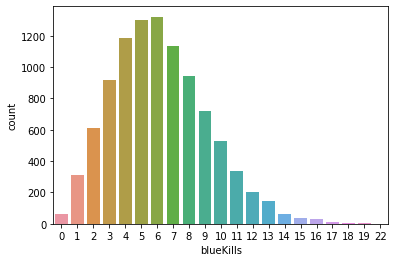

In [12]:
sns.countplot(data['blueKills'])

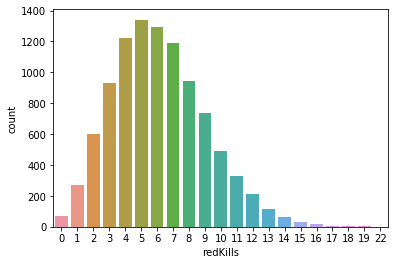

In [13]:
sns.countplot(data['redKills'])

Let's look at the correlation between the data

In [14]:
corr = data.corr()

In [15]:
corr['blueWins'].sort_values()

redGoldDiff                    -0.511119
redExperienceDiff              -0.489558
redGoldPerMin                  -0.411396
redTotalGold                   -0.411396
redTotalExperience             -0.387588
redAvgLevel                    -0.352127
redKills                       -0.339297
blueDeaths                     -0.339297
redAssists                     -0.271047
redEliteMonsters               -0.221551
redCSPerMin                    -0.212171
redTotalMinionsKilled          -0.212171
redDragons                     -0.209516
redFirstBlood                  -0.201769
redTotalJungleMinionsKilled    -0.110994
redTowersDestroyed             -0.103696
redHeralds                     -0.097172
redWardsDestroyed              -0.055400
redWardsPlaced                 -0.023671
blueWardsPlaced                 0.000087
blueWardsDestroyed              0.044247
blueHeralds                     0.092385
blueTowersDestroyed             0.115566
blueTotalJungleMinionsKilled    0.131445
blueFirstBlood  


It seems that there is columns that have perfect correlation. We should drop it 

In [16]:
data = data.drop('redDeaths',axis=1)
corr = corr.drop('redDeaths',axis=1)

In [17]:
data = data.drop('blueDeaths',axis =1)
corr = corr.drop('blueDeaths',axis =1)

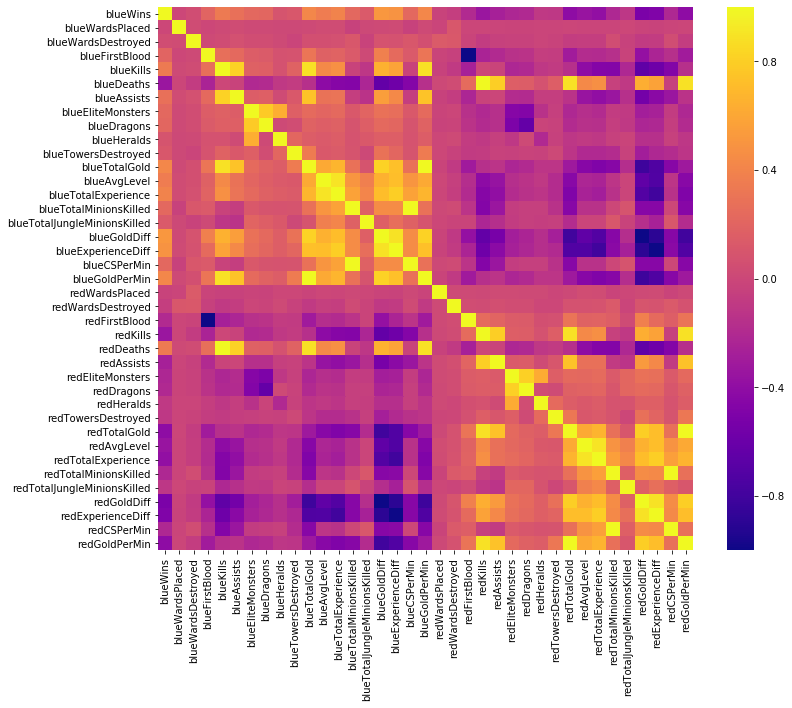

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,cmap = 'plasma')

In [19]:
data=data.drop('redFirstBlood',axis=1)
corr=corr.drop('redFirstBlood',axis=1)

In [20]:
corr['redGoldPerMin'].sort_values()

blueGoldDiff                   -0.804347
blueExperienceDiff             -0.721190
blueTotalExperience            -0.485059
blueCSPerMin                   -0.447904
blueTotalMinionsKilled         -0.447904
blueAvgLevel                   -0.440031
blueWins                       -0.411396
blueGoldPerMin                 -0.314212
blueTotalGold                  -0.314212
blueFirstBlood                 -0.301479
blueEliteMonsters              -0.216616
blueDragons                    -0.192871
blueTotalJungleMinionsKilled   -0.182167
redDeaths                      -0.161127
blueKills                      -0.161127
blueAssists                    -0.133948
blueTowersDestroyed            -0.122465
blueHeralds                    -0.109557
blueWardsDestroyed             -0.067467
blueWardsPlaced                -0.005685
redWardsPlaced                  0.010666
redWardsDestroyed               0.070784
redTotalJungleMinionsKilled     0.102632
redHeralds                      0.151762
redDragons      

In [21]:
corr['blueGoldPerMin'].sort_values()

redGoldDiff                    -0.816803
redExperienceDiff              -0.729345
redTotalExperience             -0.491268
redCSPerMin                    -0.452593
redTotalMinionsKilled          -0.452593
redAvgLevel                    -0.447049
redGoldPerMin                  -0.314212
redTotalGold                   -0.314212
redFirstBlood                  -0.312058
redEliteMonsters               -0.227236
redDragons                     -0.201794
redTotalJungleMinionsKilled    -0.175275
blueDeaths                     -0.162572
redKills                       -0.162572
redAssists                     -0.128921
redTowersDestroyed             -0.119579
redHeralds                     -0.117257
redWardsDestroyed              -0.090611
redWardsPlaced                 -0.020069
blueWardsPlaced                 0.019725
blueWardsDestroyed              0.060054
blueTotalJungleMinionsKilled    0.090769
blueHeralds                     0.153974
blueDragons                     0.186413
blueEliteMonster

In [22]:
data = data.drop(['redTotalGold','blueTotalGold'],axis=1)
corr = corr.drop(['redTotalGold','blueTotalGold'],axis=1)

In [23]:
data = data.drop('redGoldDiff',axis = 1)
corr = corr.drop('redGoldDiff',axis = 1)

In [24]:
data = data.drop('redExperienceDiff',axis=1)
corr = corr.drop('redExperienceDiff',axis=1)

In [25]:
data.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redKills', 'redAssists', 'redEliteMonsters', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redCSPerMin',
       'redGoldPerMin'],
      dtype='object')

In [26]:
data=data.drop(['redTotalMinionsKilled','blueTotalMinionsKilled'],axis=1)
corr=corr.drop(['redTotalMinionsKilled','blueTotalMinionsKilled'],axis=1)

In [27]:
data.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalExperience,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.645106,0.549954,0.361980,0.187974,0.051422,...,6.662112,0.573135,0.413098,0.160036,0.043021,6.925316,17961.730438,51.313088,21.734923,1648.904140
std,0.500024,18.019177,2.174998,0.500002,3.011028,4.064520,0.625527,0.480597,0.390712,0.244369,...,4.060612,0.626482,0.492415,0.366658,0.216900,0.305311,1198.583912,10.027885,2.191167,149.088841
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000,10465.000000,4.000000,10.700000,1121.200000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,6.800000,17209.500000,44.000000,20.300000,1542.750000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,7.000000,17974.000000,51.000000,21.800000,1637.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,...,9.000000,1.000000,1.000000,0.000000,0.000000,7.200000,18764.500000,57.000000,23.300000,1741.850000
max,1.000000,250.000000,27.000000,1.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,...,28.000000,2.000000,1.000000,1.000000,2.000000,8.200000,22269.000000,92.000000,28.900000,2273.200000


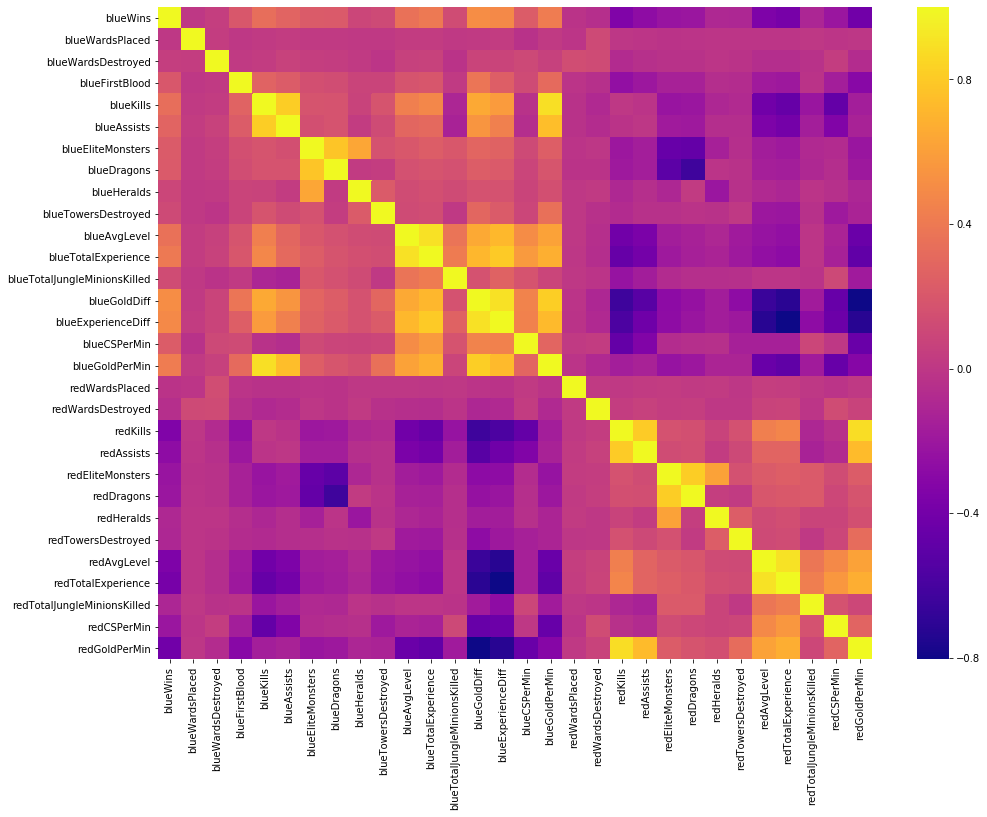

In [28]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),cmap='plasma')

## Dealing with abnormal data

For this we use the Thompson and Tietjen criteria for the first approach and simple column's dorping for second

In [29]:
#!pip install scikit_posthocs

In [30]:
from scikit_posthocs import outliers_tietjen as ot

In [31]:
def Tompson(data,column,alpha=0.05):
    mean = data[column].mean()
    std = data[column].std()       
    series = data[column].copy()                            
    series = abs(series - mean)                                  
    suspect_id = series[series==series.max()].index[0]            
    suspect = series.max()
    score = (suspect - mean)/std
    t_score = (np.sqrt(len(series)-2)*score)/np.sqrt(len(series)-1-score**2)
    if abs(t_score)>t.ppf(1-alpha/2,len(series)-2) : 
        return (True,suspect_id)
    else : 
        return (False,0)

In [32]:
def Tietjen(dcopy,column,k=1,alpha = 0.05):
    #to_del = []
    #dcopy = data.copy()
    if k == 1 :
        tom = Tompson(dcopy,column,alpha)
        if tom[0]==True : 
            dcopy.drop(tom[1],inplace = True )
            print('out - true')
            return dcopy
        else :
            print('out - false')
            return dcopy
    else :
        if ot(dcopy[column],k,hypo=True,alpha = alpha) == False :
            k=int(k/2)
            print('decrising k, now k = ',k)
            return Tietjen(dcopy,column,k,alpha)
            
        else :
            #series = dcopy[column].copy()
            #series = abs(series - series.mean())
            dcopy.drop(abs(dcopy[column] - dcopy[column].mean()).sort_values()[len(dcopy)-k:].index.tolist(),inplace = True)
            print('droping, now len = ',len(dcopy))
            return Tietjen(dcopy,column,k,alpha)
            
        
        

In [33]:
data_cp = data.copy()
data_save = data.copy()

In [34]:
data_cp = Tietjen(data_cp,'blueWardsPlaced',k=512)

droping, now len =  9367
droping, now len =  8855
droping, now len =  8343
droping, now len =  7831
decrising k, now k =  256
decrising k, now k =  128
decrising k, now k =  64
decrising k, now k =  32
decrising k, now k =  16
decrising k, now k =  8
decrising k, now k =  4
decrising k, now k =  2
decrising k, now k =  1
out - true


In [35]:
data_cp = Tietjen(data_cp,'redWardsPlaced',k=512)

droping, now len =  7318
droping, now len =  6806
droping, now len =  6294
droping, now len =  5782
decrising k, now k =  256
decrising k, now k =  128
decrising k, now k =  64
decrising k, now k =  32
decrising k, now k =  16
decrising k, now k =  8
decrising k, now k =  4
decrising k, now k =  2
decrising k, now k =  1
out - true


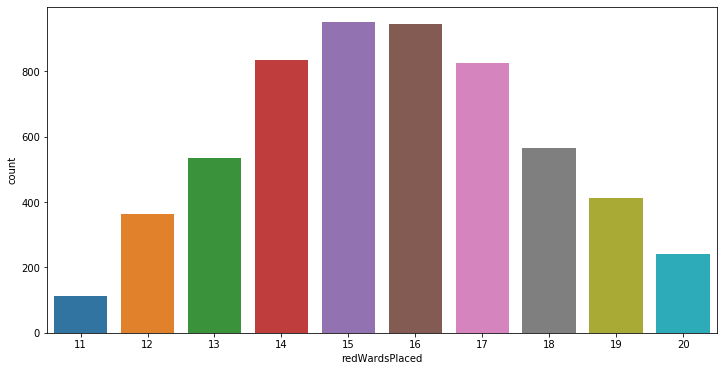

In [36]:
plt.figure(figsize=(12,6))
sns.countplot('redWardsPlaced',data=data_cp)

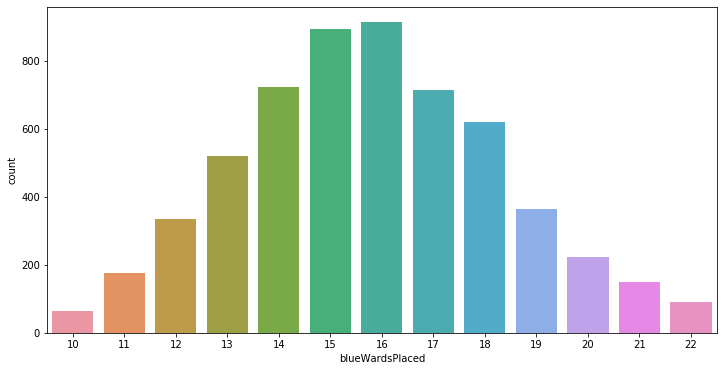

In [37]:
plt.figure(figsize=(12,6))
sns.countplot('blueWardsPlaced',data = data_cp)

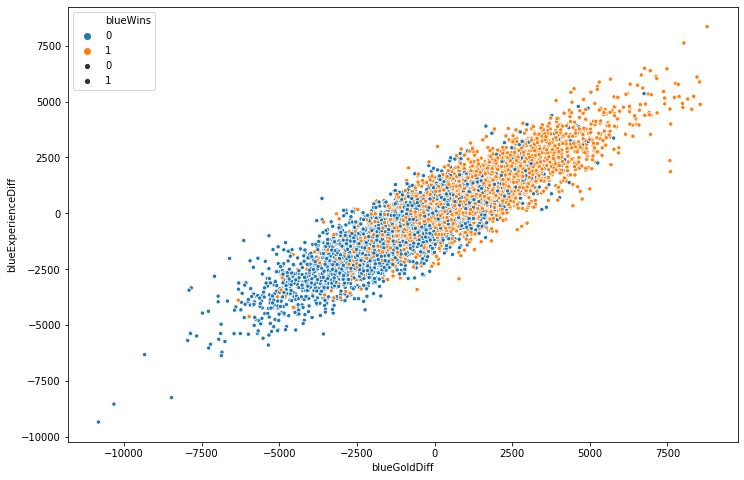

In [38]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='blueGoldDiff',y='blueExperienceDiff',data=data_cp,hue='blueWins',size=1)

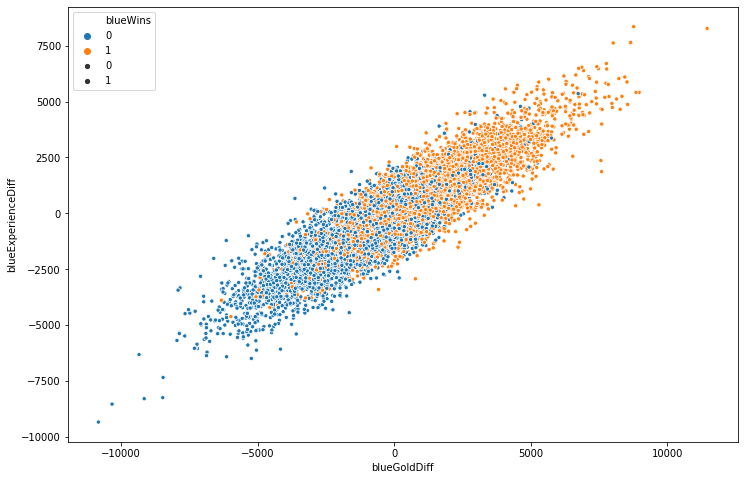

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='blueGoldDiff',y='blueExperienceDiff',data=data_save,hue='blueWins',size=1)

In [40]:
data_cp = Tietjen(data_cp,'blueKills',k=128)

droping, now len =  5653
decrising k, now k =  64
decrising k, now k =  32
decrising k, now k =  16
decrising k, now k =  8
decrising k, now k =  4
decrising k, now k =  2
decrising k, now k =  1
out - false


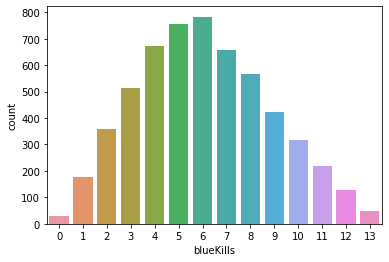

In [41]:
sns.countplot(data_cp['blueKills'])

In [42]:
data_cp = Tietjen(data_cp,'redKills',k=128)

droping, now len =  5525
decrising k, now k =  64
decrising k, now k =  32
decrising k, now k =  16
decrising k, now k =  8
decrising k, now k =  4
decrising k, now k =  2
decrising k, now k =  1
out - false


In [43]:
data_cp = Tietjen(data_cp,'blueWardsDestroyed',k=128)

droping, now len =  5397
decrising k, now k =  64
decrising k, now k =  32
decrising k, now k =  16
decrising k, now k =  8
decrising k, now k =  4
decrising k, now k =  2
decrising k, now k =  1
out - false


In [44]:
data_cp = Tietjen(data_cp,'redWardsDestroyed',k=128)

droping, now len =  5269
decrising k, now k =  64
decrising k, now k =  32
decrising k, now k =  16
decrising k, now k =  8
decrising k, now k =  4
decrising k, now k =  2
decrising k, now k =  1
out - false


In [45]:
data_save = data_save.drop(['blueWardsPlaced','blueWardsDestroyed','redWardsPlaced','redWardsDestroyed'],axis =1)

In [46]:
data_save = data_save[data_save['redKills']<=15]

In [47]:
data_save = data_save[data_save['blueKills']<=15]

In [48]:
data.drop(['blueWardsPlaced','blueWardsDestroyed','blueKills', 'blueAssists', 'blueEliteMonsters','blueTotalJungleMinionsKilled','blueCSPerMin',
           'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redAssists','redEliteMonsters','redTotalJungleMinionsKilled','redCSPerMin'],axis=1,inplace=True)

## Now let's build our models

For the first model we will use filtered data

for the second model, we will use simply truncated data with some features removed.

and in the third we will use only the most important features

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier_w = RandomForestClassifier(n_estimators=500)
classifier = RandomForestClassifier(n_estimators =500)
clasifier = RandomForestClassifier(n_estimators = 500)

In [50]:
X_w = data_cp.drop('blueWins',axis=1).values
y_w = data_cp['blueWins'].values

X = data_save.drop('blueWins',axis=1).values
y = data_save['blueWins'].values

X1=data.drop('blueWins',axis=1)
y1=data['blueWins']


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w,y_w,test_size=0.3)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3)

In [53]:
classifier_w.fit(X_w_train,y_w_train)  #first

classifier.fit(X_train,y_train)        #second

clasifier.fit(X1_train,y1_train)       #third

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
Predictions_w = classifier_w.predict(X_w_test)

Predictions = classifier.predict(X_test)

pred = clasifier.predict(X1_test)

In [56]:
# first
print(confusion_matrix(y_w_test,Predictions_w))
print('\n')
print(classification_report(y_w_test,Predictions_w))

[[563 246]
 [198 574]]


              precision    recall  f1-score   support

           0       0.74      0.70      0.72       809
           1       0.70      0.74      0.72       772

    accuracy                           0.72      1581
   macro avg       0.72      0.72      0.72      1581
weighted avg       0.72      0.72      0.72      1581



In [57]:
#second
print(confusion_matrix(y_test,Predictions))
print('\n')
print(classification_report(y_test,Predictions))

[[1065  415]
 [ 402 1057]]


              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1480
           1       0.72      0.72      0.72      1459

    accuracy                           0.72      2939
   macro avg       0.72      0.72      0.72      2939
weighted avg       0.72      0.72      0.72      2939



In [58]:
#thire
print(confusion_matrix(y1_test,pred))
print('\n')
print(classification_report(y1_test,pred))

[[1069  426]
 [ 375 1094]]


              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1495
           1       0.72      0.74      0.73      1469

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964



## Now let's use simple neural networks

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()

scaler2 = MinMaxScaler()

scal = MinMaxScaler()

In [60]:
X_w_train = scaler1.fit_transform(X_w_train)
X_w_test = scaler1.transform(X_w_test)

X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

X1_train = scal.fit_transform(X1_train)
X1_test = scal.transform(X1_test)

In [61]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
model_w = Sequential()

In [63]:
model = Sequential()

In [64]:
early_stop = EarlyStopping(mode='min',patience=10,verbose=2)

In [65]:
#firs model
model_w.add(Dense(29,activation='relu'))

model_w.add(Dense(200,activation = 'relu'))
model_w.add(Dropout(0.4))

model_w.add(Dense(200,activation='relu'))
model_w.add(Dropout(0.4))

model_w.add(Dense(50,activation='relu'))
model_w.add(Dropout(0.5))

model_w.add(Dense(14,activation='relu'))

model_w.add(Dense(1,activation='sigmoid'))

model_w.compile(optimizer='adam',loss='binary_crossentropy')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [66]:
#second model
model.add(Dense(25,activation='relu'))

model.add(Dense(200,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(50,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(13,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [67]:
#third model
model1 = Sequential()

model1.add(Dense(15,activation='relu'))

model1.add(Dense(16,activation = 'relu'))
model1.add(Dropout(0.5))

#model1.add(Dense(225,activation='relu'))
#model1.add(Dropout(0.5))

#model1.add(Dense(45,activation='relu'))
#model1.add(Dropout(0.5))

#model1.add(Dense(15,activation='relu'))

model1.add(Dense(1,activation='sigmoid'))

model1.compile(optimizer='adam',loss='binary_crossentropy')

In [68]:
model_w.fit(X_w_train,y_w_train,batch_size=256,epochs = 100,verbose = 2,callbacks=[early_stop],validation_data=(X_w_test,y_w_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3688 samples, validate on 1581 samples
Epoch 1/100
3688/3688 - 2s - loss: 0.6886 - val_loss: 0.6737
Epoch 2/100
3688/3688 - 0s - loss: 0.6649 - val_loss: 0.6321
Epoch 3/100
3688/3688 - 0s - loss: 0.6303 - val_loss: 0.6000
Epoch 4/100
3688/3688 - 0s - loss: 0.6045 - val_loss: 0.5765
Epoch 5/100
3688/3688 - 0s - loss: 0.5932 - val_loss: 0.5673
Epoch 6/100
3688/3688 - 0s - loss: 0.5853 - val_loss: 0.5582
Epoch 7/100
3688/3688 - 0s - loss: 0.5756 - val_loss: 0.5610
Epoch 8/100
3688/3688 - 0s - loss: 0.5722 - val_loss: 0.5543
Epoch 9/100
3688/3688 - 0s - loss: 0.5683 - val_loss: 0.5506
Epoch 10/100
3688/3688 - 0s - loss: 0.5613 - val_loss: 0.5489
Epoch 11/100
3688/3688 - 0s - loss: 0.5588 - val_loss: 0.5455
Epoch 12/100
3688/3688 - 0s - loss: 0.5616 - val_loss: 0.5489
Epoch 13/100
3688/3688 - 0s - loss: 0.5595 - val_loss: 0.5490
Epoch 14/100
3688/3688 - 0s - loss: 0.5619 - val_loss: 0.5453

In [69]:
model.fit(X_train,y_train,batch_size=256,epochs = 100,verbose = 2,callbacks=[early_stop],validation_data=(X_test,y_test))

Train on 6857 samples, validate on 2939 samples
Epoch 1/100
6857/6857 - 2s - loss: 0.6780 - val_loss: 0.6354
Epoch 2/100
6857/6857 - 0s - loss: 0.6152 - val_loss: 0.5692
Epoch 3/100
6857/6857 - 0s - loss: 0.5762 - val_loss: 0.5509
Epoch 4/100
6857/6857 - 0s - loss: 0.5596 - val_loss: 0.5436
Epoch 5/100
6857/6857 - 0s - loss: 0.5534 - val_loss: 0.5400
Epoch 6/100
6857/6857 - 0s - loss: 0.5539 - val_loss: 0.5412
Epoch 7/100
6857/6857 - 0s - loss: 0.5511 - val_loss: 0.5412
Epoch 8/100
6857/6857 - 0s - loss: 0.5477 - val_loss: 0.5462
Epoch 9/100
6857/6857 - 0s - loss: 0.5510 - val_loss: 0.5401
Epoch 10/100
6857/6857 - 0s - loss: 0.5451 - val_loss: 0.5391
Epoch 11/100
6857/6857 - 0s - loss: 0.5485 - val_loss: 0.5375
Epoch 12/100
6857/6857 - 0s - loss: 0.5419 - val_loss: 0.5383
Epoch 13/100
6857/6857 - 0s - loss: 0.5448 - val_loss: 0.5410
Epoch 14/100
6857/6857 - 0s - loss: 0.5414 - val_loss: 0.5353
Epoch 15/100
6857/6857 - 0s - loss: 0.5416 - val_loss: 0.5393
Epoch 16/100
6857/6857 - 0s - l

In [74]:
y1_train = y1_train.values

In [75]:
model1.fit(X1_train,y1_train,batch_size=128,epochs = 200,verbose = 2,callbacks=[early_stop],validation_data=(X1_test,y1_test))

Train on 6915 samples, validate on 2964 samples
Epoch 1/200
6915/6915 - 1s - loss: 0.6869 - val_loss: 0.6659
Epoch 2/200
6915/6915 - 0s - loss: 0.6583 - val_loss: 0.6321
Epoch 3/200
6915/6915 - 0s - loss: 0.6393 - val_loss: 0.6060
Epoch 4/200
6915/6915 - 0s - loss: 0.6216 - val_loss: 0.5847
Epoch 5/200
6915/6915 - 0s - loss: 0.6088 - val_loss: 0.5716
Epoch 6/200
6915/6915 - 0s - loss: 0.5985 - val_loss: 0.5631
Epoch 7/200
6915/6915 - 0s - loss: 0.5868 - val_loss: 0.5519
Epoch 8/200
6915/6915 - 0s - loss: 0.5804 - val_loss: 0.5478
Epoch 9/200
6915/6915 - 0s - loss: 0.5731 - val_loss: 0.5413
Epoch 10/200
6915/6915 - 0s - loss: 0.5732 - val_loss: 0.5396
Epoch 11/200
6915/6915 - 0s - loss: 0.5712 - val_loss: 0.5358
Epoch 12/200
6915/6915 - 0s - loss: 0.5684 - val_loss: 0.5363
Epoch 13/200
6915/6915 - 0s - loss: 0.5681 - val_loss: 0.5343
Epoch 14/200
6915/6915 - 0s - loss: 0.5679 - val_loss: 0.5355
Epoch 15/200
6915/6915 - 0s - loss: 0.5668 - val_loss: 0.5344
Epoch 16/200
6915/6915 - 0s - l

In [76]:
predictions_w = model_w.predict_classes(X_w_test)

predictions = model.predict_classes(X_test)

preds = model1.predict_classes(X1_test)

In [77]:
#first
print(confusion_matrix(y_w_test,predictions_w))
print('\n')
print(classification_report(y_w_test,predictions_w))

[[578 231]
 [215 557]]


              precision    recall  f1-score   support

           0       0.73      0.71      0.72       809
           1       0.71      0.72      0.71       772

    accuracy                           0.72      1581
   macro avg       0.72      0.72      0.72      1581
weighted avg       0.72      0.72      0.72      1581



In [78]:
#second
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1013  467]
 [ 347 1112]]


              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1480
           1       0.70      0.76      0.73      1459

    accuracy                           0.72      2939
   macro avg       0.72      0.72      0.72      2939
weighted avg       0.72      0.72      0.72      2939



In [79]:
#Third
print(confusion_matrix(y1_test,preds))
print('\n')
print(classification_report(y1_test,preds))

[[1088  407]
 [ 367 1102]]


              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1495
           1       0.73      0.75      0.74      1469

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964

